In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset("iris")
iris
# iris.species.unique()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: >

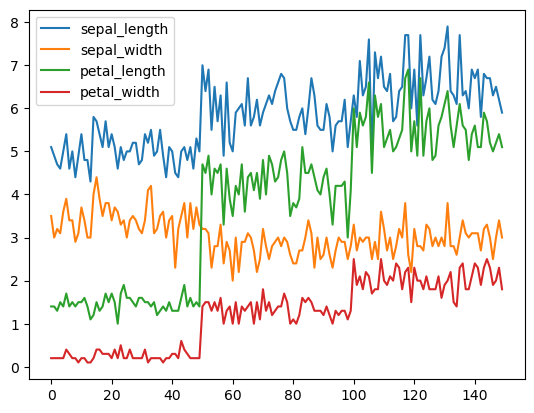

In [2]:
iris.plot()

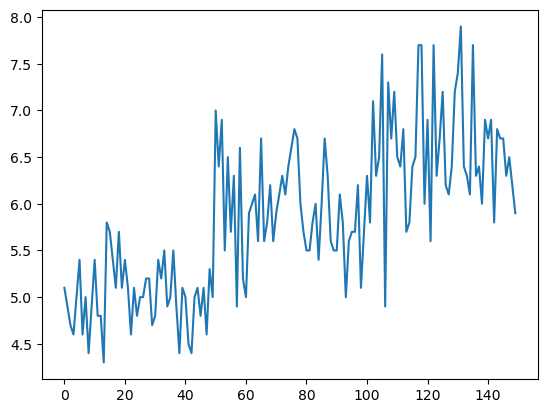

In [3]:
iris.sepal_length.plot()
# plt.show()
plt.savefig("sepallength,pdf")

<Axes: >

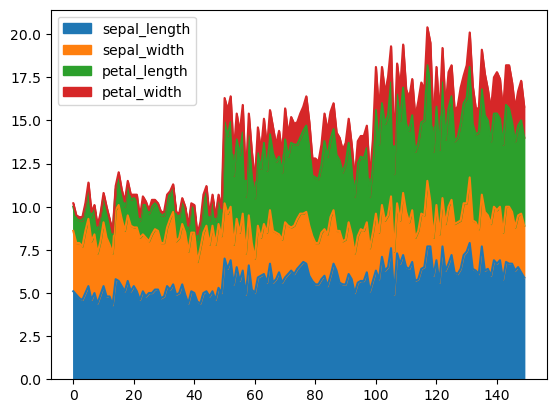

In [4]:
# iris.plot.line()
# iris.plot.bar()
# iris.plot.barh()
# iris.plot.hist()
# iris.plot.box()
# iris.plot.density()
iris.plot.area()

<Axes: >

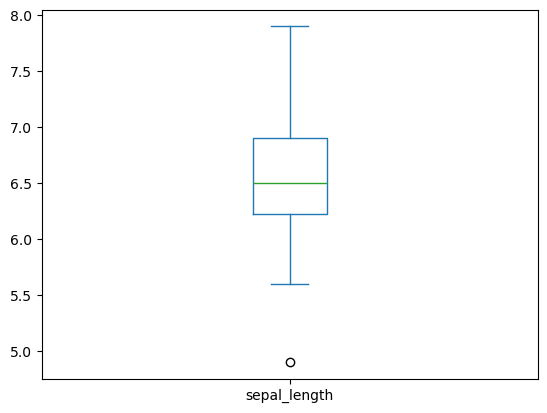

In [5]:
iris_group = iris.groupby("species")
virginica = iris_group.get_group("virginica")
virginica.plot.box(x="species", y="sepal_length")

In [6]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: xlabel='species', ylabel='sepal_length'>

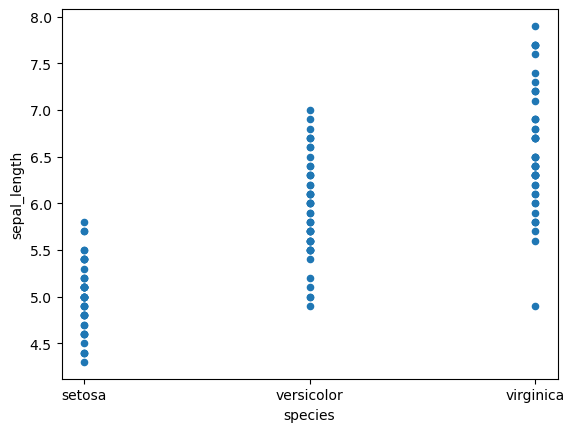

In [7]:
# iris.plot.pie(x="species", y="petal_length")
iris.plot.scatter(x="species", y="sepal_length")

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

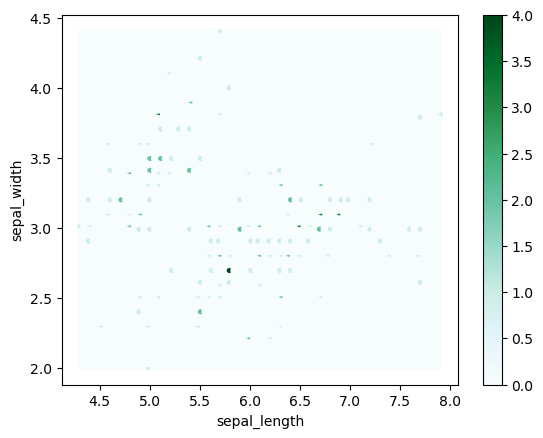

In [8]:
iris.plot.hexbin(x="sepal_length", y="sepal_width")

In [9]:
tips = sns.load_dataset("tips")
# tips.plot.pie(x="sex", y="tip")

group_tips = tips.groupby("sex")

tip_stats = []

for grp, info in group_tips:
    tips_dict = {}

    avg_tip = round(info.tip.mean(), 2)
    avg_bill = round(info.total_bill.mean(), 2)
    
    tips_dict["Gender"] = grp
    tips_dict["Tips"] = round(info.tip.mean(), 2)
    tips_dict["Total_Bills"] = round(info.total_bill.mean(), 2)
    tips_dict["Tips_Percent"] = round(avg_tip / avg_bill * 100)
    tip_stats.append(tips_dict)

tip_df = pd.DataFrame(tip_stats)
tip_df

C:\Users\pin77\AppData\Local\Temp\ipykernel_8212\1554547116.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_tips = tips.groupby("sex")


,Gender,Tips,Total_Bills,Tips_Percent
0,Male,3.09,20.74,15
1,Female,2.83,18.06,16


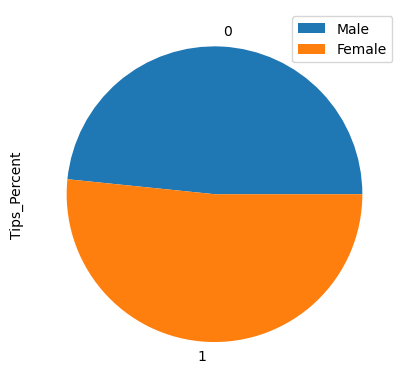

In [22]:
tip_df.plot.pie(x="Gender", y="Tips_Percent")
labels = tip_df.Gender.unique()
plt.legend(labels)

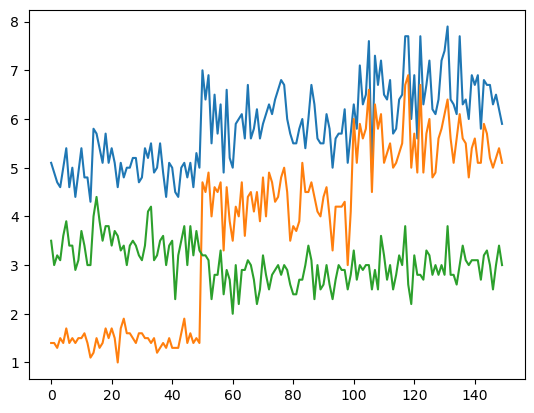

In [11]:
# multiple plot method 1
plt.figure() # Prepare the space

plt.plot(iris.sepal_length)
plt.plot(iris.petal_length)
plt.plot(iris.sepal_width)

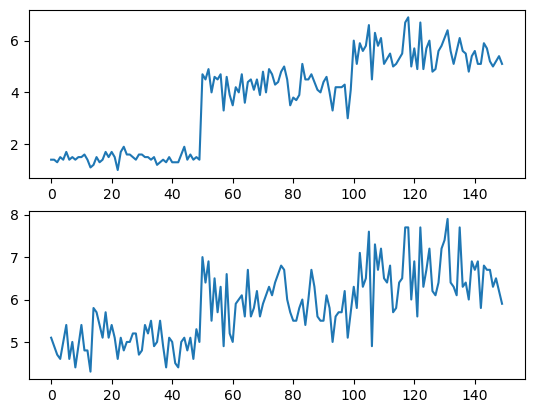

In [12]:
# multiple plot method 1
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(iris.petal_length)

plt.subplot(2, 1, 2)
plt.plot(iris.sepal_length)

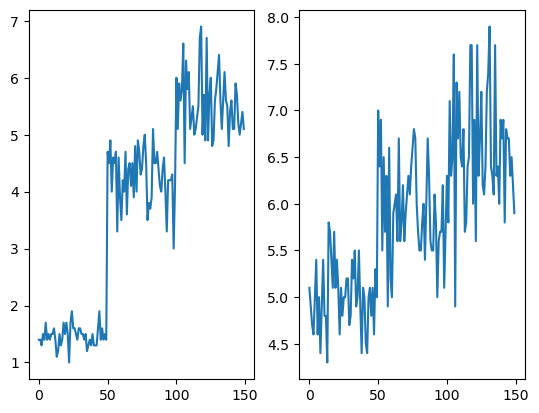

In [13]:
# multiple plot method 2
plt.figure()

plt.subplot(1, 2, 1)
plt.plot(iris.petal_length)

plt.subplot(1, 2, 2)
plt.plot(iris.sepal_length)

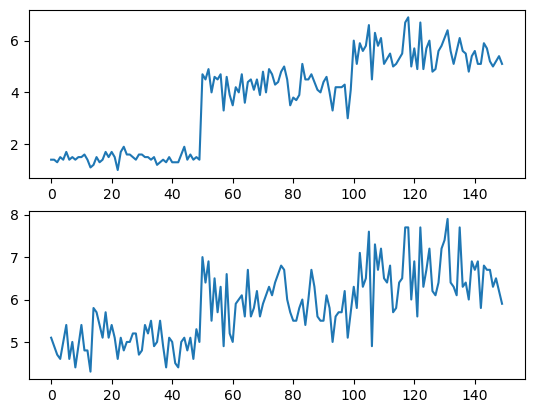

In [14]:
# multiple plot method 3
fig, ax = plt.subplots(2)

ax[0].plot(iris.petal_length)

ax[1].plot(iris.sepal_length)

Text(0, 0.5, 'Tips')

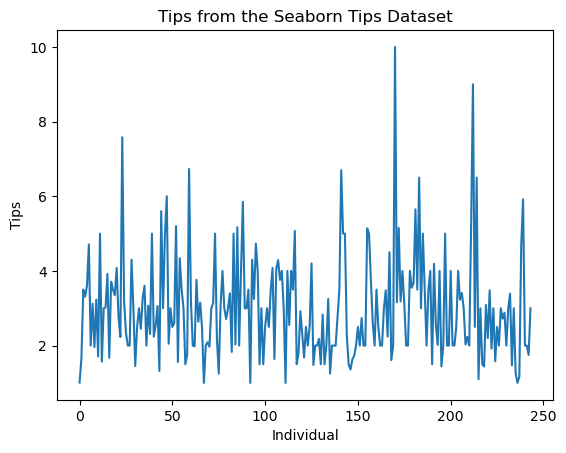

In [15]:
# Labelling
plt.figure()

# Chart types
plt.plot(tips.tip)

# Chart title
plt.title("Tips from the Seaborn Tips Dataset")

# x Label
plt.xlabel("Individual")

# Y label
plt.ylabel("Tips")

(-12.15, 255.15, -1.4905000000000004, 53.3005)

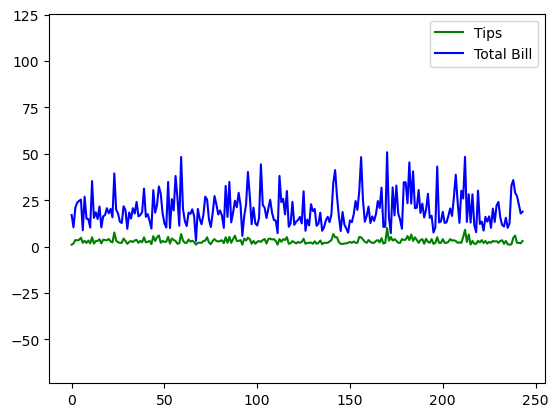

In [16]:
# Customization
plt.figure()

# -g = Green color, --g = full line Green color, label is the name of the data
plt.plot(tips.tip, '-g', label="Tips")

# -b = Blue Color, --gb = dode line Blue color, label is the name of the data
plt.plot(tips.total_bill, '-b', label="Total Bill")

# The data name box and control it location(upper left)
plt.legend(loc="upper right")

# Control the gap of x and y
plt.axis("equal")

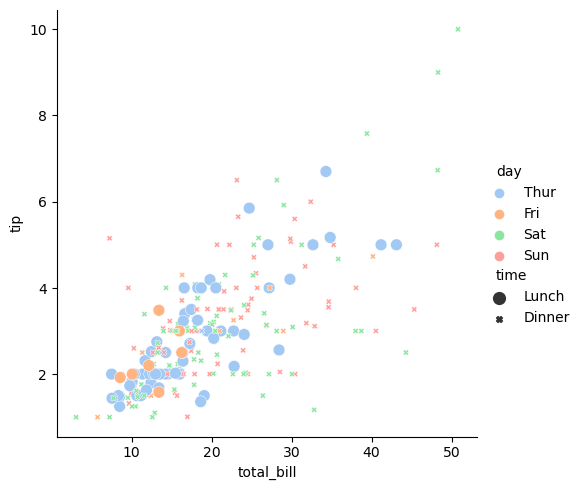

In [30]:
# hue is data name frame.
# palette is color.
# size is the size of the dode.
# style is the shape of the dode.
# kind is the type of the chart.
sns.relplot(x="total_bill", y="tip", data=tips, hue="day", palette="pastel", size="time", style="time", kind="scatter")

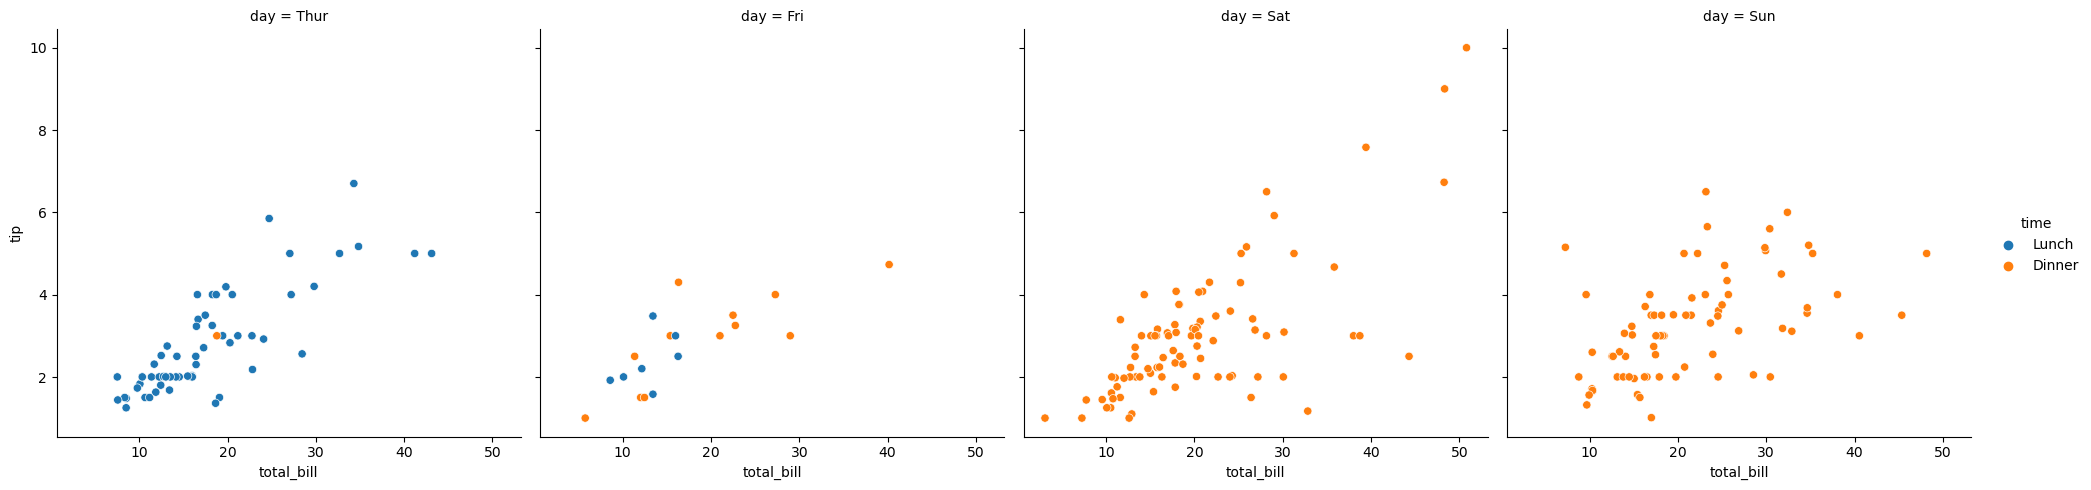

In [18]:
# col = multiple chart
sns.relplot(x="total_bill", y="tip", hue="time", col="day", data=tips)

C:\Users\pin77\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\pin77\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\pin77\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

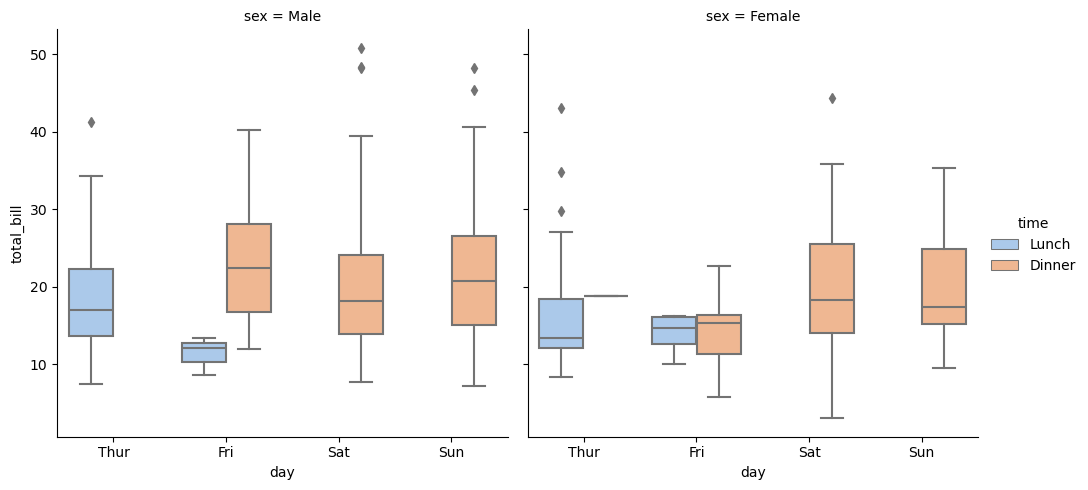

In [19]:
# kind is the type of the chart
# hue is data name frame
# col is multiple chart
# palette is color of the data
sns.catplot(x="day", y="total_bill", kind="box", hue="time", palette="pastel", col="sex", data=tips)